In [ ]:
!pip install sodapy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px #
from sodapy import Socrata # api
import missingno as msno # check NAs
import matplotlib.pyplot as plt
%matplotlib inline

mosquitos data

In [ ]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("jqe8-8r6s", limit=60000)

# Convert to pandas DataFrame
df_trap_raw = pd.DataFrame.from_records(results)


In [ ]:
df_trap_raw.tail()



,season_year,week,test_id,block,trap,trap_type,test_date,number_of_mosquitoes,result,species,latitude,longitude,location,:@computed_region_43wa_7qmu,:@computed_region_bdys_3d7i,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_awaf_s7ux
32873,2007,21,20012,75XX N OAKLEY AVE,T148,GRAVID,2007-05-29T00:05:00.000,1,negative,CULEX PIPIENS/RESTUANS,42.01780085,-87.687601446,"{'latitude': '42.0178008501155', 'longitude': ...",5,341,22528,20,3
32874,2007,21,20038,22XX W 113TH ST,T086,GRAVID,2007-05-29T00:05:00.000,1,negative,CULEX PIPIENS/RESTUANS,41.68817059,-87.678251676,"{'latitude': '41.688170589570205', 'longitude'...",42,378,22212,74,33
32875,2007,21,20051,2XX W 89TH ST,T096,CDC,2007-05-29T00:05:00.000,5,negative,CULEX RESTUANS,41.732428064,-87.63105648,"{'latitude': '41.73242806400838', 'longitude':...",13,187,21554,45,18
32876,2007,21,20031,22XX N CANNON DR,T054,GRAVID,2007-05-29T00:05:00.000,2,negative,CULEX PIPIENS/RESTUANS,41.922512377,-87.63237767,"{'latitude': '41.922512376871495', 'longitude'...",34,207,21190,68,51
32877,2007,21,20027,22XX N CANNON DR,T054,GRAVID,2007-05-29T00:05:00.000,3,negative,CULEX RESTUANS,41.922512377,-87.63237767,"{'latitude': '41.922512376871495', 'longitude'...",34,207,21190,68,51


In [ ]:
df_trap_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32878 entries, 0 to 32877
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   season_year                  32878 non-null  object
 1   week                         32878 non-null  object
 2   test_id                      32878 non-null  object
 3   block                        32878 non-null  object
 4   trap                         32878 non-null  object
 5   trap_type                    32878 non-null  object
 6   test_date                    32878 non-null  object
 7   number_of_mosquitoes         32878 non-null  object
 8   result                       32878 non-null  object
 9   species                      32878 non-null  object
 10  latitude                     27990 non-null  object
 11  longitude                    27990 non-null  object
 12  location                     27990 non-null  object
 13  :@computed_region_43wa_7qmu  27

In [ ]:
df_trap = df_trap_raw
df_trap['number_of_mosquitoes'] = df_trap_raw["number_of_mosquitoes"].astype(int)

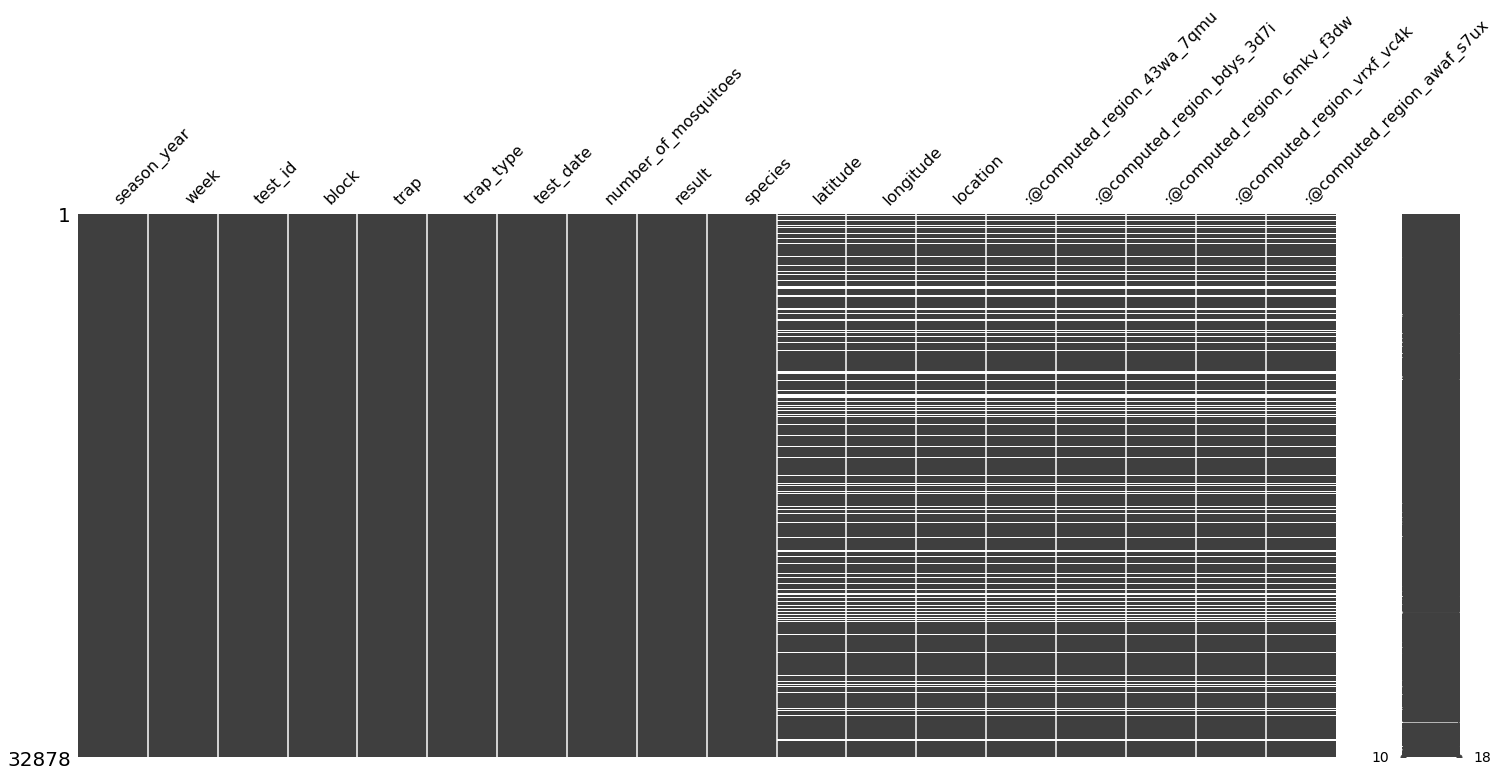

In [ ]:
msno.matrix(df_trap)


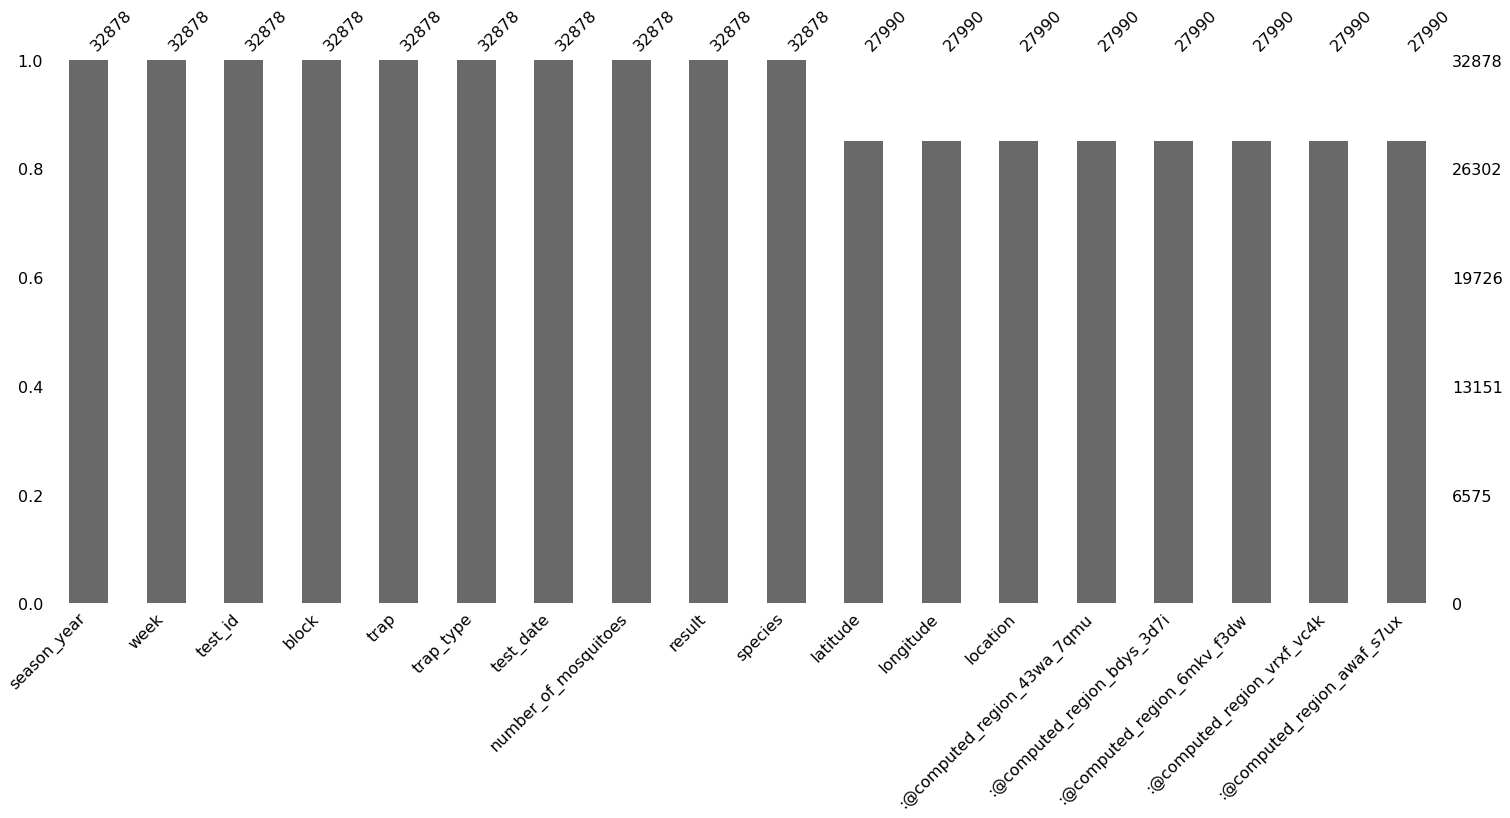

In [ ]:
msno.bar(df_trap)


In [ ]:
df_trap['result'].unique()

array(['negative', 'positive'], dtype=object)

In [ ]:
df_trap['result_b'] =  (df_trap['result'] == 'negative').astype('int')

In [ ]:
data_vis_1 = pd.DataFrame(df_trap.groupby(['season_year','trap'])['result_b'].sum()).reset_index()
data_vis_1

,season_year,trap,result_b
0,2007,T001,15
1,2007,T002,41
2,2007,T003,26
3,2007,T004,12
4,2007,T005,12
...,...,...,...
1330,2021,T909,44
1331,2021,T910,21
1332,2021,T912,19
1333,2021,T913,16


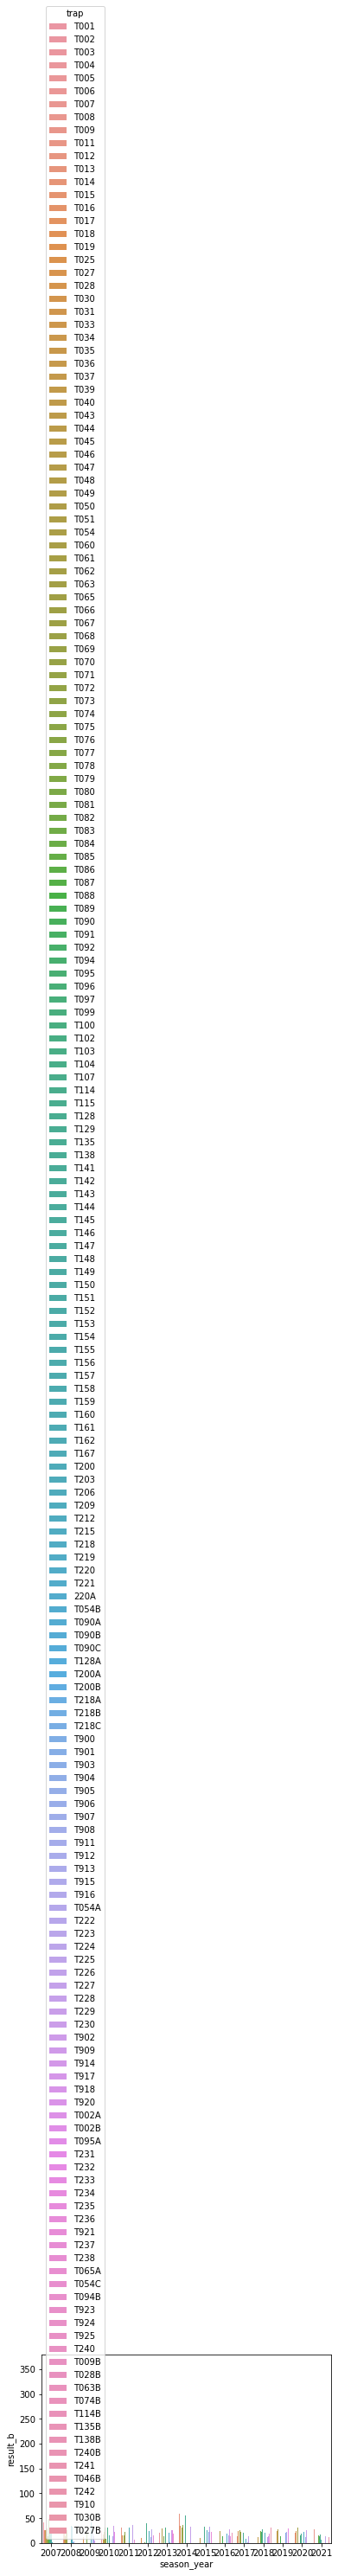

In [ ]:
sns.barplot(x="season_year", y="result_b", data=data_vis_1,
            hue='trap')

Text(0.5, 1.0, 'total mosquitos in traps over time')

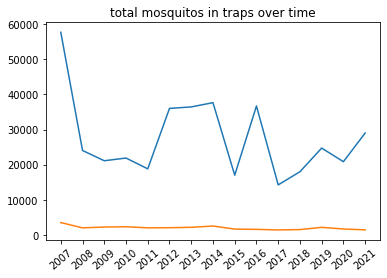

In [ ]:
plt.plot(
    df_trap.groupby('season_year').sum('number_of_mosquitoes')
)
plt.xticks(rotation=40)
plt.title('total mosquitos in traps over time')

In [ ]:

px.set_mapbox_access_token('pk.eyJ1IjoiZHJlYW0zciIsImEiOiJja3p0ZnZwem4xbjExMnZuYTNyNm05NXFkIn0.Mn-2ZucLu2QP-9nS1UZbKA')
fig = px.scatter_mapbox(data_frame = df_trap_raw, lat = 'latitude', lon  = 'longitude',
                        size_max=15, zoom = 10)

fig.update_layout(title = 'Traps',
    autosize=False,
    width=500,
    height=700,)

fig.show()

TypeError: ignored

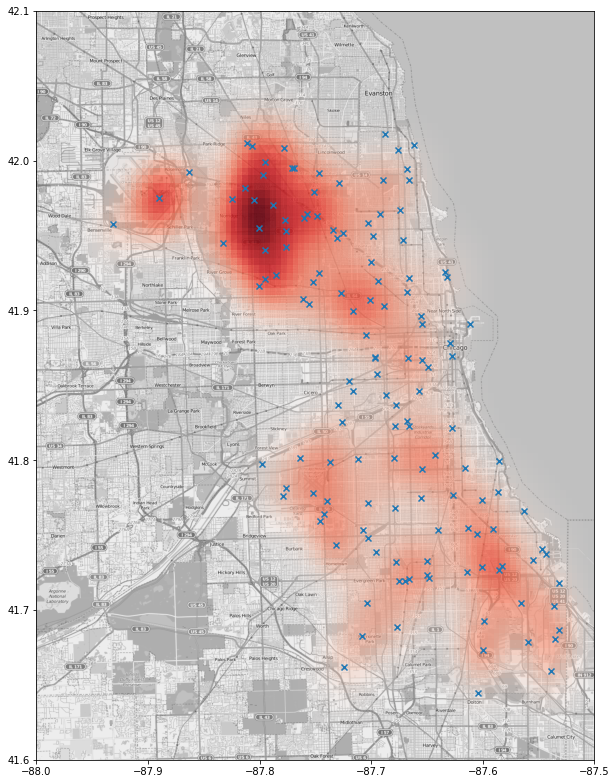

In [ ]:

mapdata = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/Capstone/data/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/data/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = traps[traps['WnvPresent'] > 0]
sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

plt.savefig('heatmap.png')

spray data

In [ ]:
spary = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/data/spray.csv')

In [ ]:
spary.sort_values(by='Date')

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
69,2011-08-29,7:09:58 PM,42.390335,-88.096443
68,2011-08-29,7:09:48 PM,42.390642,-88.096440
67,2011-08-29,7:09:38 PM,42.390952,-88.096437
66,2011-08-29,7:09:28 PM,42.391238,-88.096468
...,...,...,...,...
14222,2013-09-05,8:34:33 PM,42.008443,-87.816412
14223,2013-09-05,8:34:43 PM,42.007913,-87.816418
14224,2013-09-05,8:34:53 PM,42.007373,-87.816382
14226,2013-09-05,8:35:13 PM,42.006233,-87.816385


In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/data/weather.csv')

In [1]:
weather.columns()

NameError: ignored